In [ ]:
pip install pystan==2.17

In [ ]:
conda install -c conda-forge prophet

In [ ]:
conda update -n base -c defaults conda

In [1]:
import pandas as pd
from prophet import Prophet

In [15]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('daily-min-temperatures.csv')
df.head()

Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

In [3]:
df = df.rename(columns={'Date': 'ds', 'Temp': 'y'})
m = Prophet()
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
4010 1991-12-27
4011 1991-12-28
4012 1991-12-29
4013 1991-12-30
4014 1991-12-31

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
4010 1991-12-27  14.458738   11.002106   18.005312
4011 1991-12-28  14.476996   10.999211   18.131681
4012 1991-12-29  14.448027   10.792866   17.832093
4013 1991-12-30  14.650134   10.988798   17.876319
4014 1991-12-31  14.820812   11.365231   18.248985

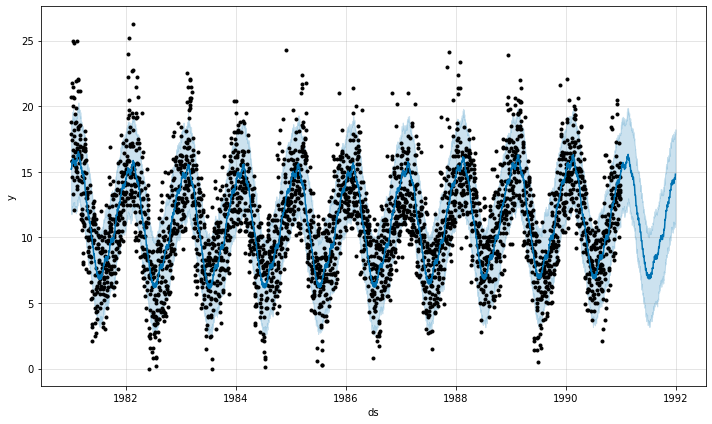

In [6]:
fig1 = m.plot(forecast)

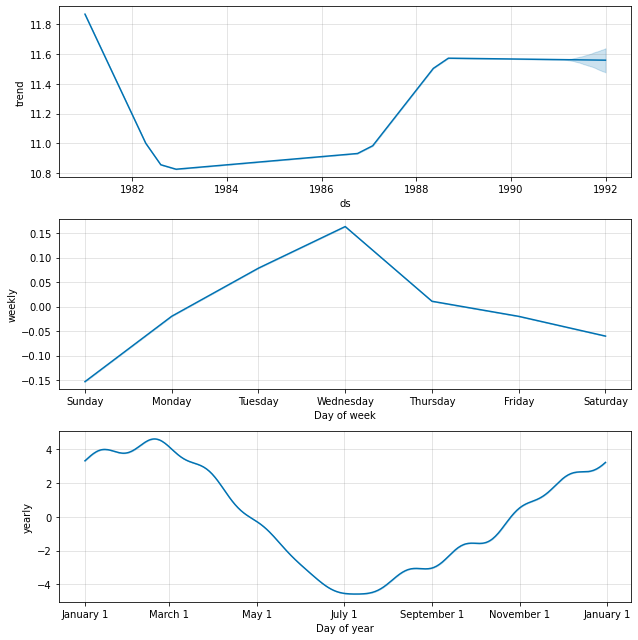

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)

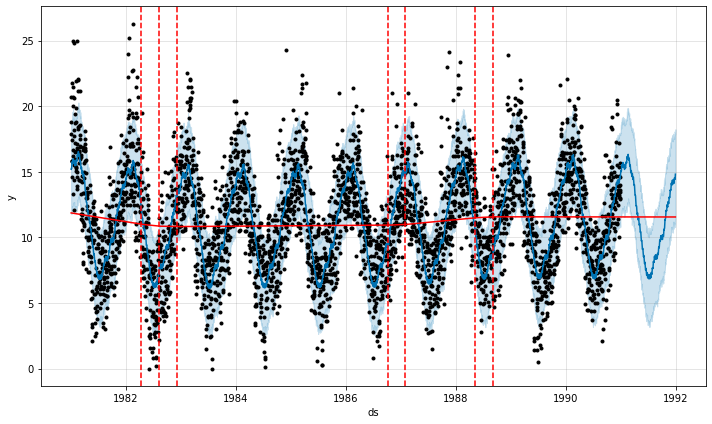

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


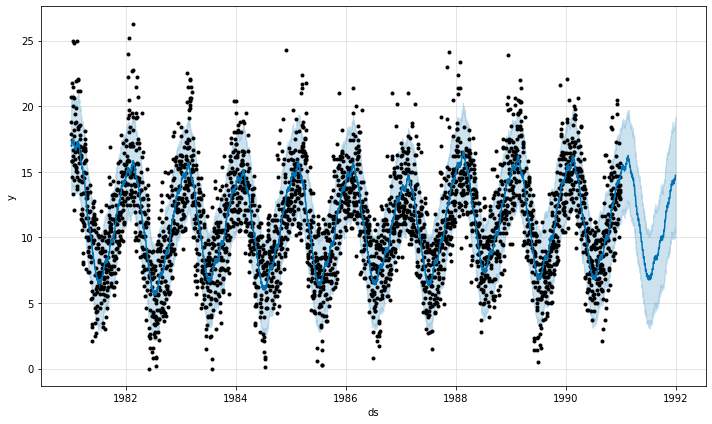

In [13]:
m = Prophet(changepoint_prior_scale=0.9)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


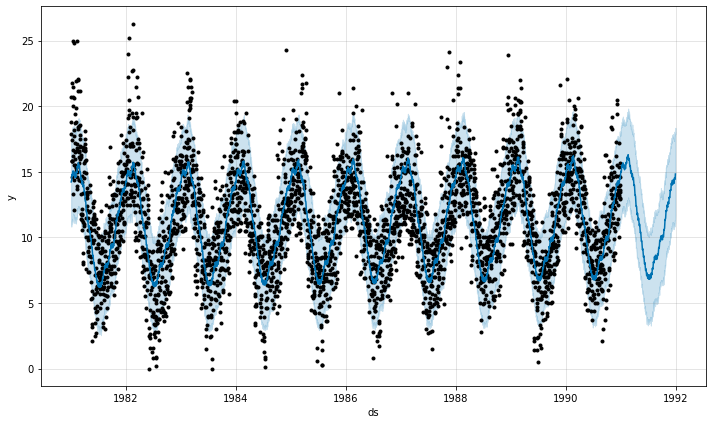

In [12]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)


In [21]:
holidays = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                       superbowl
1                  New Year's Day
2       New Year's Day (Observed)
3           Washington's Birthday
4                    Memorial Day
5                Independence Day
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9         Veterans Day (Observed)
10                   Thanksgiving
11                  Christmas Day
12     Martin Luther King Jr. Day
13    Independence Day (Observed)
14       Christmas Day (Observed)
dtype: object

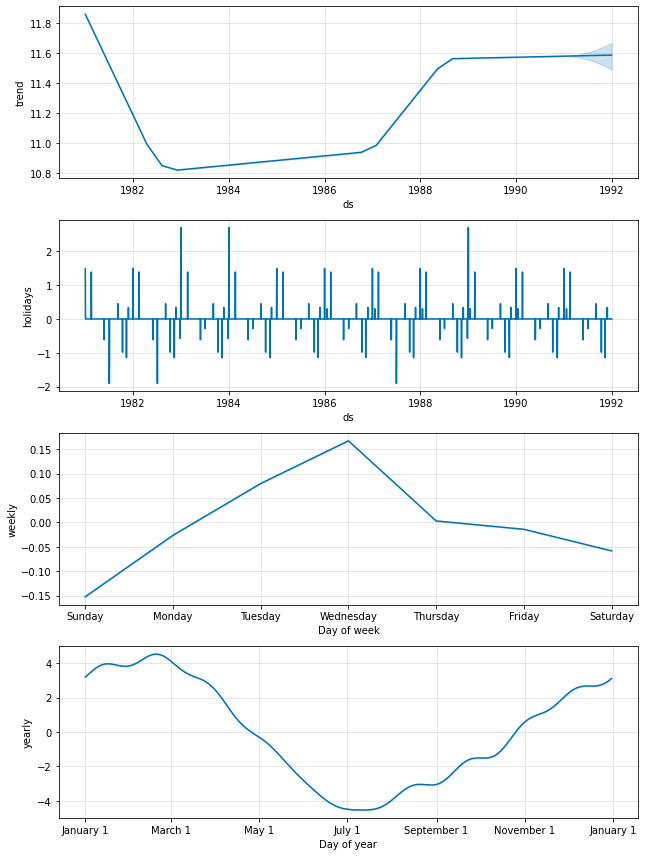

In [22]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


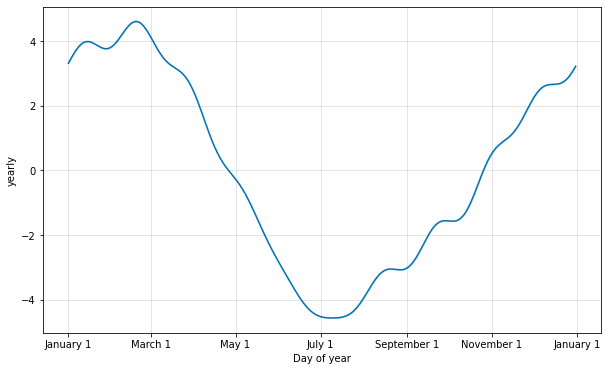

In [23]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)